## Task 1: Pre-processing

In [ ]:

"""
@InProceedings{maas-EtAl:2011:ACL-HLT2011,
  author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
  title     = {Learning Word Vectors for Sentiment Analysis},
  booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},
  month     = {June},
  year      = {2011},
  address   = {Portland, Oregon, USA},
  publisher = {Association for Computational Linguistics},
  pages     = {142--150},
  url       = {http://www.aclweb.org/anthology/P11-1015}
}
"""

'\n@InProceedings{maas-EtAl:2011:ACL-HLT2011,\n  author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},\n  title     = {Learning Word Vectors for Sentiment Analysis},\n  booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},\n  month     = {June},\n  year      = {2011},\n  address   = {Portland, Oregon, USA},\n  publisher = {Association for Computational Linguistics},\n  pages     = {142--150},\n  url       = {http://www.aclweb.org/anthology/P11-1015}\n}\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 'aclImdb_v1.tar.gz' is the zipped folder in your Google Drive
path = "/content/drive/MyDrive/COMP551/aclImdb_v1.tar.gz"

import os
import glob
import re
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
# Unzipping the folder
!tar -xzvf /content/drive/MyDrive/COMP551/aclImdb_v1.tar.gz -C /content/drive/MyDrive/COMP551/

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

### Task 1.1: IMDB Reviews

In [ ]:
# Source: https://github.com/yueliyl/comp551-notebooks/blob/master/LinearRegression.ipynb
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        self.w = None

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]  # Add a dimension for the features
        if self.add_bias:
            x = np.column_stack([x, np.ones(x.shape[0])])  # Add bias
        self.w = np.linalg.lstsq(x, y, rcond=None)[0]  # Solve for w
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            x = np.column_stack([x, np.ones(x.shape[0])])  # Adjust to use x's shape[0]
        yh = x @ self.w  # Predict the y values
        return yh


In [ ]:
# Create a vector representation of what words are present in each piece of text
def vectorize_text(texts, word_list):
    X = np.zeros((len(texts), len(word_list)))  # Initialize feature matrix
    word_index = {word: i for i, word in enumerate(word_list)}  # Word to index mapping
    for i, text in enumerate(texts):
        for word in text.split():
            if word in word_list:
                X[i, word_index[word]] = 1  # Binary representation (presence/absence)
    return X

def preprocess_reviews(paths_to_reviews):

    # Step 1: Find Document Frequencies
    df_counts = defaultdict(int)  # Dictionary to store document frequency counts
    doc_count = 0  # Total number of documents
    all_words = set()  # Set to store all words in the reviews

    for path_to_reviews in paths_to_reviews:
        # for file in glob.glob(path + path_to_reviews + "*.txt"):
        for file in glob.glob(path_to_reviews + "*.txt"):
            with open(file, 'r', encoding='utf-8') as f:
                raw_review = f.read()
                words_in_doc = set((re.sub(r'[^\w\s]', '', raw_review)).casefold().split())
                for word in words_in_doc:
                    df_counts[word] += 1
            doc_count += 1

    # Calculate thresholds for filtering
    min_doc_threshold = doc_count * 0.01  # 1% of the documents
    max_doc_threshold = doc_count * 0.50  # 50% of the documents
    print("Document count:", doc_count)
    print("Min threshold:", min_doc_threshold)
    print("Max threshold:", max_doc_threshold)
    print("Number of words, unfiltered:", len(df_counts))
    # Step 2: Preprocess and Filter Reviews
    # Step 3: Extract Ratings - 1 for positive 0 for negative.
    reviews = []
    ratings = []

    for path_to_reviews in paths_to_reviews:
        cur_path_reviews = []
        cur_path_ratings = []
        # for file in glob.glob(path + path_to_reviews + "*.txt"):
        for file in glob.glob(path_to_reviews + "*.txt"):
            with open(file, 'r', encoding='utf-8') as f:
                raw_review = f.read()
                review_cleaned = (re.sub(r'[^\w\s]', '', raw_review)).casefold()
                review_words = review_cleaned.split()

                # Filter words based on document frequency thresholds
                filtered_words = [word for word in review_words if min_doc_threshold < df_counts[word] < max_doc_threshold]
                all_words.update(set(filtered_words))

                # Extract rating from filename
                rating = int(file.split("_")[-1].split(".")[0])

                # Positive rating if >5, else negative
                rating = 1 if rating > 5 else 0

                filtered_words = [word for word in review_words]
                cur_path_reviews.append(" ".join(filtered_words))
                cur_path_ratings.append(rating)

                cur_path_reviews.append(" ".join(filtered_words))
                cur_path_ratings.append(rating)

        # Append the reviews and ratings for the current review to the main lists
        reviews.extend(cur_path_reviews)
        ratings.extend(cur_path_ratings)

    reviews = np.array(reviews)
    ratings = np.array(ratings)

    print("Number of words, filtered:", len(all_words))

    return reviews, ratings, sorted(all_words) # convert set to list

# path to "aclImdb" library (change if youre running on your drive...)
base_path = "/content/drive/MyDrive/COMP551/aclImdb/"

reviews, ratings, all_words = preprocess_reviews(["/content/drive/MyDrive/COMP551/aclImdb/train/neg/", "/content/drive/MyDrive/COMP551/aclImdb/train/pos/"])

# Step 4: Vectorize Features
features = vectorize_text(reviews, all_words)
print("Feature matrix shape:", features.shape)

# Step 5: Train a Classifier
model = LinearRegression()
yh = model.fit(features,ratings).predict(features)

# Step 6: Extract D features by their absolute regression coefficients with the rating scores (1-10)
# D in 100...1000;
D = 100

if model.add_bias: # Exclude the bias term from the weights and words for analysis
    weights = model.w[:-1]
else:
    weights = model.w

# Features are sorted from least to most positive, i.e. most positive is at the end
sorted_words = [word for _, word in sorted(zip(weights, all_words))]

# Top features with the most positive coefficients
top_positive_words = sorted_words[-(D//2):]  # most positive is at the end

# Top features with the most negative coefficients
top_negative_words = sorted_words[:(D//2)]  # most negative is at the beginning

print("Top positive words:", top_positive_words)
print("Top negative words:", top_negative_words)

# Step 7: Remove features from X_reviews that are not in the top D features
top_features = top_positive_words + top_negative_words
top_features_index = {word: i for i, word in enumerate(top_features)}
X_reviews = vectorize_text(reviews, top_features)

# Preprocess and vectorize test reviews
X_reviews_test, y_reviews_test, _ = preprocess_reviews(["/content/drive/MyDrive/COMP551/aclImdb/test/neg/", "/content/drive/MyDrive/COMP551/aclImdb/test/pos/"])
X_reviews_test = vectorize_text(X_reviews_test, top_features)

Document count: 25000
Min threshold: 250.0
Max threshold: 12500.0
Number of words, unfiltered: 121042
Number of words, filtered: 1725
Feature matrix shape: (50000, 1725)
Top positive words: ['highly', 'realistic', 'perfectly', 'humour', 'quiet', 'beautifully', 'tears', 'surprisingly', 'easy', 'cry', 'remarkable', 'surprised', 'simple', 'touching', 'finest', 'plenty', 'liked', 'subtle', 'jump', 'criminal', 'jack', 'atmosphere', 'originally', 'expecting', 'wonderful', 'fun', 'enjoyed', 'superb', 'best', 'recommended', 'amazing', 'solid', 'incredible', 'loved', 'perfect', 'great', 'awesome', 'available', 'favorite', 'today', 'unusual', 'enjoyable', 'fascinating', 'rare', 'gem', 'funniest', 'wonderfully', 'excellent', '8', '7']
Top negative words: ['worst', 'disappointment', 'disappointing', 'lacks', 'waste', 'fails', 'dull', 'grade', 'poorly', 'laughable', 'skip', 'wooden', 'awful', 'annoying', 'mediocre', 'avoid', 'boring', 'bad', 'redeeming', 'poor', 'mess', 'hoping', 'sadly', 'predicta

### Task 1.2: 20 news groups a multi-class labelled textual dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_extraction.text import TfidfVectorizer
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Fetch the dataset, narrowing down to 5 categories
categories = [
    'comp.graphics',
    'misc.forsale',
    'rec.sport.baseball',
    'sci.med',
    'talk.politics.guns'
]

train_data = fetch_20newsgroups(subset='train', categories=categories,
                                remove=('headers', 'footers', 'quotes'))

test_data = fetch_20newsgroups(subset='test', categories=categories,
                               remove=('headers', 'footers', 'quotes'))

# Filter out words based on document frequencies
df_counts = defaultdict(int)
n_documents = len(train_data.data)

# Tokenize and update counts
for text in train_data.data:
    # Tokenize by word, remove punctuation, convert to lowercase
    words = set(re.findall(r'\b\w\w+\b', text.lower()))
    for word in words:
        df_counts[word] += 1

min_df = 0.01 * n_documents
max_df = 0.5 * n_documents

words_to_be_filtered = {word for word, count in df_counts.items() if count < min_df or count > max_df}
word_list = list(set(df_counts.keys()) - words_to_be_filtered)

def filter_text(text, filtered_words):
    return " ".join(word for word in re.findall(r'\b\w\w+\b', text.lower()) if word not in filtered_words)

train_data_filtered = [filter_text(text, words_to_be_filtered) for text in train_data.data]
test_data_filtered = [filter_text(text, words_to_be_filtered) for text in test_data.data]

# Vectorize the filtered training data
X_news = vectorize_text(train_data_filtered, word_list)
X_test_news = vectorize_text(test_data_filtered, word_list)
y_news = train_data.target
y_test_news = test_data.target

def find_top_features_for_class(X, y, class_label, word_list, top_k=100):
    # Binary classification - class vs. all
    y_binary = (y == class_label).astype(int)

    # Compute mutual information scores
    mi_scores = mutual_info_classif(X, y_binary, random_state=0)

    # Get top k features for the class
    top_features_indices = mi_scores.argsort()[-top_k:][::-1]
    top_features = {word_list[i]: mi_scores[i] for i in top_features_indices}

    return top_features

# Get top features for all classes
top_features_all_classes = {class_label: find_top_features_for_class(X_news, y_news, class_label, word_list, top_k=100)
                            for class_label in range(len(train_data.target_names))}
print(top_features_all_classes)

# Prepare a new feature matrix with the top k features
# not sure about this stuff
k = 100
top_features = set()
for class_label in range(len(train_data.target_names)):
    top_features.update(top_features_all_classes[class_label].keys())
top_features = list(top_features)
top_feature_index = {feature: i for i, feature in enumerate(top_features)}

# Filter the original feature matrix X_news by the top k features
X_news = X_news[:, [word_list.index(feature) for feature in top_features]]
X_test_news = X_test_news[:, [word_list.index(feature) for feature in top_features]]

print(X_news.shape)
print(X_test_news.shape)
print(y_news.shape)
print(y_test_news.shape)

{0: {'graphics': 0.05269839406320198, 'file': 0.03661292416480655, 'image': 0.033908804996162445, 'surrender': 0.024634738313337623, 'geb': 0.023322937642818342, 'images': 0.022160609590119673, 'files': 0.022122713198743593, 'season': 0.021885910258498287, 'voice': 0.020904747771860466, '3d': 0.02050355626483169, 'let': 0.02039060505905499, 'didn': 0.02038757427654403, 'cover': 0.020169766192642324, 'mac': 0.020012545277712235, 'fire': 0.019912690060928107, 'program': 0.019675814971494843, 'house': 0.019343082522574218, 'majority': 0.01934204482069335, 'interface': 0.019312632475090075, 'release': 0.018789314267212642, 'totally': 0.01858489892242976, 'soon': 0.01857263730813008, 'programs': 0.018552079220958806, 'hi': 0.01854761134229288, 'well': 0.018218836717720066, 'bill': 0.017761948492812873, 'animation': 0.017586503863798786, 'ftp': 0.017190996975557926, 'minutes': 0.016907981466370847, 'despite': 0.016754823301283084, 'big': 0.01673666171233279, 'spot': 0.016664157236366828, 'sa

## Task 2

## Implement and evaluate Logistic Regression on the IMDB data

In [ ]:
# Source: COMP551 Notebooks.
logistic = lambda z: 1. / (1 + np.exp(-z))

def cross_entropy_loss(y, yh):
    return -np.mean(y * np.log(yh) + (1 - y) * np.log(1 - yh))

class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=0.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.verbose = verbose
        self.loss_history = []  # To store loss at each iteration

    def gradient(self, x, y):
        N, D = x.shape
        yh = logistic(np.dot(x, self.w))  # predictions size N
        grad = np.dot(x.T, yh - y) / N  # divide by N because cost is mean over N points
        return grad

    def gradient_check(self, x, y, epsilon=1e-5):
        original_w = self.w.copy()
        approx_gradients = np.zeros_like(self.w)
        for i in range(len(self.w)):
            self.w[i] += epsilon
            loss_plus = cross_entropy_loss(y, logistic(np.dot(x, self.w)))
            self.w[i] -= 2 * epsilon
            loss_minus = cross_entropy_loss(y, logistic(np.dot(x, self.w)))
            approx_gradients[i] = (loss_plus - loss_minus) / (2 * epsilon)
            self.w = original_w.copy()  # Reset to original after modification
        print("Numerical gradient", approx_gradients)
        print("Analytical gradient", self.gradient(x, y))
        print("Difference", np.linalg.norm(approx_gradients - self.gradient(x, y)))
        return approx_gradients

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def fit_crossentropy(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            if t == 0:  # Gradient checking at the first iteration
                approx_g = self.gradient_check(x, y)
                if self.verbose:
                    print(f"Gradient check completed. Performed at iteration 0. {np.linalg.norm(g - approx_g)}")
            self.w = self.w - self.learning_rate * g
            yh = logistic(np.dot(x, self.w))
            loss = cross_entropy_loss(y, yh)
            self.loss_history.append(loss)
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(Nt)])
        yh = logistic(np.dot(x, self.w))  # predict output
        return yh

In [ ]:
# Implement and evaluate Logistic Regression on the IMDB data

# Step 1: Train a logistic regression model on the IMDB data
model = LogisticRegression(verbose=False)
model.fit(X_reviews, ratings)

# Re-evaluate model
yh = model.predict(X_reviews)
yh = (yh > 0.5).astype(int)
accuracy = np.mean(yh == y_reviews_test)
print(f'Accuracy: {accuracy:.2f}')

# Step 2: Evaluate the model on the test data
yh = model.predict(X_reviews_test)
yh = (yh > 0.5).astype(int)
accuracy = np.mean(yh == y_reviews_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81
Accuracy: 0.80


### AUROC IMMDb
Evaluating binary classification using Receiver Operating Characteristic (ROC) curve and area under the ROC curve (AUROC), comparing with Decision Trees

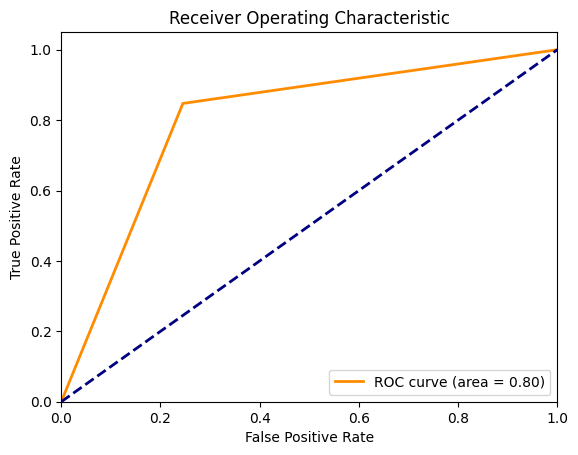

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# y_true = y_reviews_test
# y_pred_probs = yh
fpr, tpr, thresholds = roc_curve(y_reviews_test, yh)
roc_auc = roc_auc_score(y_reviews_test, yh)

# Code to plot ROC curve if needed
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

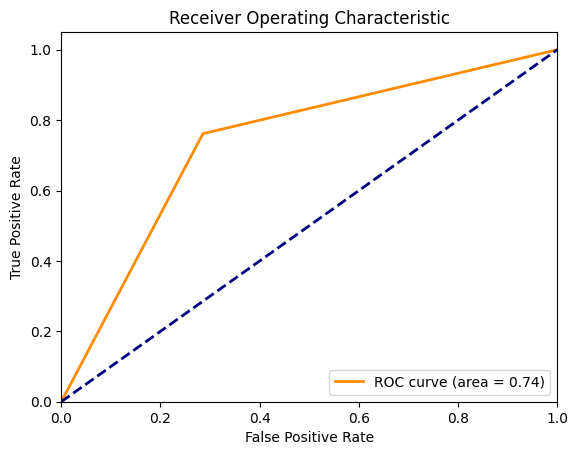

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Binary classification with Decision Tree
dt_classifier_bin = DecisionTreeClassifier()
dt_classifier_bin.fit(X_reviews, ratings)
y_pred_bin = dt_classifier_bin.predict(X_reviews_test)

fpr, tpr, thresholds = roc_curve(y_reviews_test, y_pred_bin)
roc_auc = roc_auc_score(y_reviews_test, y_pred_bin)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Implementing and evaluate the Multiclass Regression on the 5-class prediction from the 20-news-group data

In [ ]:
class LinearRegressionGD:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        self.w = None
        self.loss_history = []  # Ensure this is reset for each fit call if necessary

    def gradient(self, x, y):
        if self.add_bias:
            x = np.column_stack([x, np.ones(x.shape[0])])  # Ensure bias term is added
        y_pred = x @ self.w
        error = y_pred - y
        gradient = (x.T @ error) / len(x)  # Gradient of the MSE loss
        return gradient

    def fit(self, x, y, lr=0.005, niter=42000):
        if self.add_bias:
            x = np.column_stack([x, np.ones(x.shape[0])])
        self.w = np.zeros(x.shape[1])
        self.loss_history = []  # Resetting or initializing loss history

        for i in range(niter):
            y_pred = x @ self.w
            error = y_pred - y
            gradient = (x.T @ error) / len(x)
            self.w -= lr * gradient

            # loss calculation (Mean Squared Error)
            loss = np.mean(error ** 2)
            self.loss_history.append(loss)  # Append loss to history

    def predict(self, x):
        if self.add_bias:
            if x.shape[1] + 1 == len(self.w):  # Check if bias needs to be added
                x = np.column_stack([x, np.ones(x.shape[0])])
        return x @ self.w

In [ ]:
class MulticlassLinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        self.models = None

    def cross_entropy(self, X, Y):
        if self.add_bias:
            X = np.column_stack([X, np.ones(X.shape[0])])
        loss = 0
        for i in range(Y.shape[1]):  # One model per class
            model = self.models[i]
            y_pred = logistic(np.dot(X, model.w))
            loss += np.mean(-Y[:, i] * np.log(y_pred) - (1 - Y[:, i]) * np.log(1 - y_pred))
        return loss / Y.shape[1]  # Average loss across all classes

    def fit_crossentropy(self, X, Y, lr=0.005, niter=42000):
        losses_train = np.zeros(niter)
        self.models = []

        for i in range(Y.shape[1]):  # One model per class
            print("Training model for class", i)
            model = LinearRegressionGD(self.add_bias)
            model.fit(X, Y[:, i], lr, niter)
            self.models.append(model)

            if model.loss_history:  # Check if loss_history is not empty
                losses_train += np.array(model.loss_history)  # Safe to add
            else:
                print(f"Warning: Empty loss history for model {i}. Check the fit method.")

        losses_train /= Y.shape[1]  # Average across classes
        return losses_train

    def check_grad(self, X, y, epsilon=1e-5):
        model = self.models[0]  # Example: checking gradient for the first model
        W_original = model.w.copy()
        gradient_analytical = model.gradient(X, y)

        grad_approx = np.zeros(W_original.shape)
        for i in range(len(model.w)):
            # Perturb weights with epsilon
            W_plus = model.w.copy()
            W_plus[i] += epsilon
            model.w = W_plus
            loss_plus = np.mean((X @ model.w - y) ** 2)

            # Perturb weights with -epsilon
            W_minus = model.w.copy()
            W_minus[i] -= epsilon
            model.w = W_minus
            loss_minus = np.mean((X @ model.w - y) ** 2)

            # Numerical gradient approximation
            grad_approx[i] = (loss_plus - loss_minus) / (2 * epsilon)

        # Reset model weights to original
        model.w = W_original

        # Compare analytical and numerical gradients
        error = np.linalg.norm(gradient_analytical - grad_approx) / (np.linalg.norm(gradient_analytical) + np.linalg.norm(grad_approx))
        return error

    def fit(self, X, Y):
        self.models = []
        for i in range(Y.shape[1]):  # Assuming Y is one-hot encoded
            print("Executing model", i)
            model = LinearRegression(self.add_bias)
            model.fit(X, Y[:, i])
            self.models.append(model)
        return self

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models]).T
        # Convert predictions to class labels
        return np.argmax(predictions, axis=1)

In [ ]:
# Run Multiclass LR on the 5 of 20 Newsgroups data
model = MulticlassLinearRegression()

# Convert the target labels to one-hot encoding
y_news_one_hot = np.zeros((y_news.size, y_news.max()+1))
y_news_one_hot[np.arange(y_news.size), y_news] = 1
y_news_test_one_hot = np.zeros((y_test_news.size, y_test_news.max()+1))
y_news_test_one_hot[np.arange(y_test_news.size), y_test_news] = 1

# Train the model
model.fit(X_news, y_news_one_hot)
yh = model.predict(X_test_news)
accuracy = np.mean(yh == y_test_news)
print(f'Accuracy: {accuracy:.2f}')

Executing model 0
Executing model 1
Executing model 2
Executing model 3
Executing model 4
Accuracy: 0.74


### Classification accuracy 20 news group
Evaluating multi-class prediction using classification accuracy, compare with Decision Trees

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Multi-class classification with Decision Tree
# Train on original data (not one hot encoded)
dt_classifier_multi = DecisionTreeClassifier()
dt_classifier_multi.fit(X_news, y_news)
y_pred_multi = dt_classifier_multi.predict(X_test_news)

accuracy_MC = accuracy_score(y_test_news, yh)
print(f'Multiclass classification accuracy: {accuracy_MC}')

accuracy_DT = accuracy_score(y_test_news, y_pred_multi)
print(f'Decision Tree accuracy: {accuracy_DT}')

Multiclass classification accuracy: 0.7360537190082644
Decision Tree accuracy: 0.6337809917355371


## Task 2.1 Check gradient computed

### 2.1.1 - Verifying gradient calculation IMDb Reviews

Numerical gradient [-0.0106  -0.00466 -0.00594 -0.00164 -0.00216 -0.0057  -0.00242 -0.00286
 -0.0045  -0.0024  -0.0031  -0.00336 -0.00618 -0.00534 -0.0033  -0.00198
 -0.00496 -0.00436  0.00066 -0.00118 -0.003   -0.0042  -0.00092  0.00054
 -0.01738 -0.00884 -0.00916 -0.00814 -0.028   -0.005   -0.01218 -0.00408
 -0.00464 -0.01212 -0.01418 -0.04216 -0.00388 -0.0025  -0.01144 -0.008
 -0.00266 -0.00552 -0.00342 -0.00426 -0.00422 -0.00254 -0.00476 -0.02112
 -0.00278 -0.00292  0.03594  0.00394  0.00436  0.00312  0.02218  0.00652
  0.00858  0.0023   0.00946  0.00612  0.00266  0.00414  0.02124  0.00964
  0.00384  0.00902  0.01704  0.05664  0.00516  0.01676  0.00754  0.0033
  0.00272  0.0068   0.00056  0.009    0.00074  0.00716  0.00768  0.00502
  0.0094   0.00738  0.01622  0.01352  0.00828  0.00476  0.00288  0.00484
 -0.00124  0.00382  0.01746  0.00226  0.00486  0.00032  0.00738  0.00128
  0.00504  0.00076  0.00092  0.00108  0.     ]
Analytical gradient [-0.0106  -0.00466 -0.00594 -0.00164 -0.0

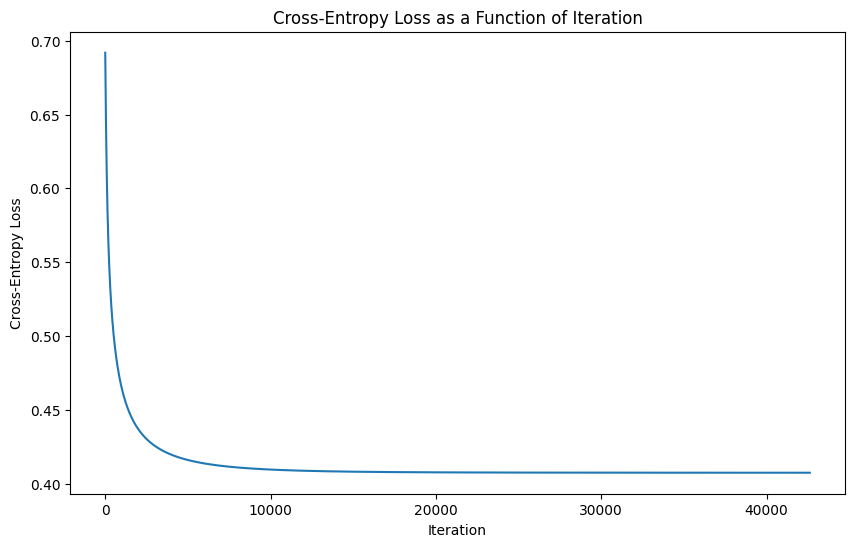

Training Accuracy: 0.81
Test Accuracy: 0.80


In [ ]:
# Implement and evaluate Logistic Regression on the IMDB data

# Train a logistic regression model on the IMDB data
model = LogisticRegression(verbose=True)
model.fit_crossentropy(X_reviews, ratings)

# Print gradient check information and loss history
if model.verbose:
    print("Cross-Entropy Loss History for every 100 iterations:")
    for i, loss in enumerate(model.loss_history):
        if i % 1000 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(model.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss as a Function of Iteration')
plt.show()

# Re-evaluate model on training data to see in-sample accuracy
yh = model.predict(X_reviews)
yh = (yh > 0.5).astype(int)
accuracy = np.mean(yh == ratings)  # Assuming 'ratings' is your training labels
print(f'Training Accuracy: {accuracy:.2f}')

# Evaluate the model on the test data
yh = model.predict(X_reviews_test)
yh = (yh > 0.5).astype(int)
accuracy = np.mean(yh == y_reviews_test)
print(f'Test Accuracy: {accuracy:.2f}')

### 2.1.2 - Verifying gradient calculation 20 news group dataset

Training model for class 0
Training model for class 1
Training model for class 2
Training model for class 3
Training model for class 4


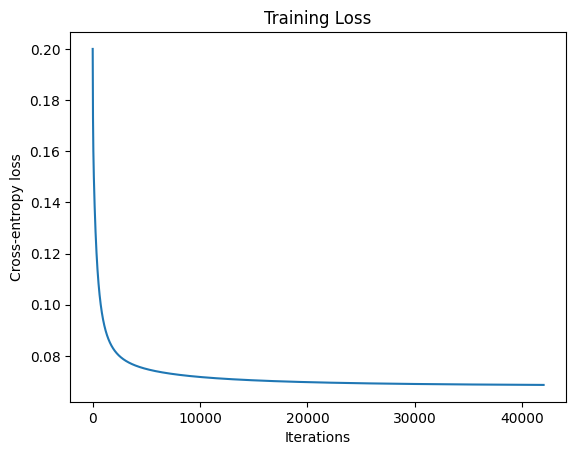

In [95]:
# ... (After training your MulticlassLinearRegression model)

# Run Multiclass LR on the 5 of 20 Newsgroups data
model = MulticlassLinearRegression()

# Convert the target labels to one-hot encoding
y_news_one_hot = np.zeros((y_news.size, y_news.max()+1))
y_news_one_hot[np.arange(y_news.size), y_news] = 1

# Train the model
losses_train = model.fit_crossentropy(X_news, y_news_one_hot)

plt.plot(losses_train)
plt.xlabel('Iterations')
plt.ylabel('Cross-entropy loss')
plt.title('Training Loss')
plt.show()

# Task 3: Run experiments

## 3.1 - Report the top 10 features with the most positive coefficients and the top 10 features with the most negative coefficients on the IMDB data using simple linear regression on the movie rating scores.

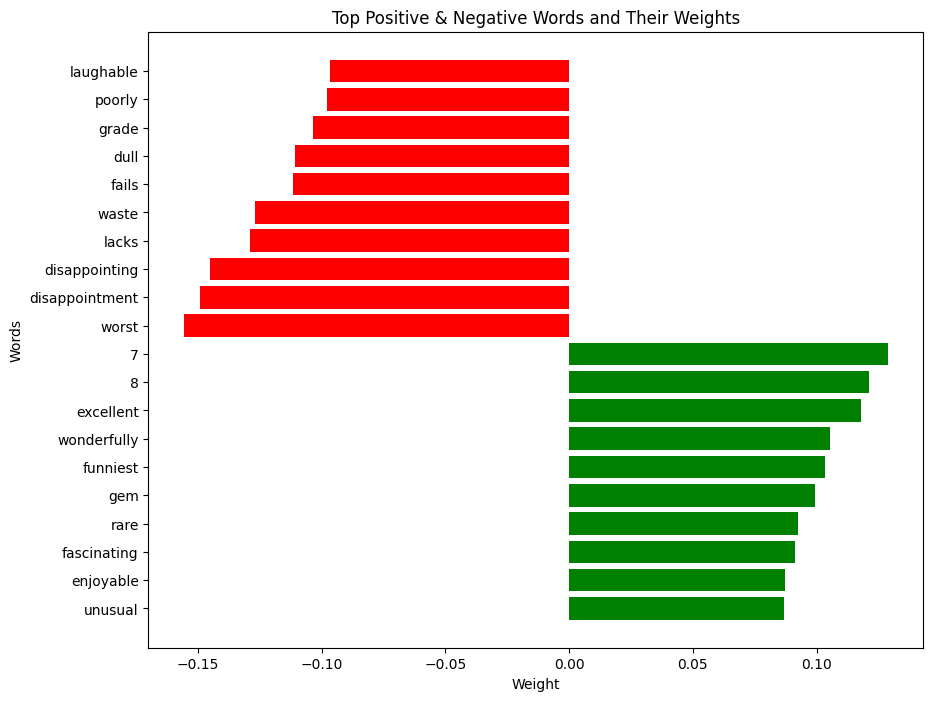

In [ ]:
# Plot for report: bar chart for top 10 pos/neg features
word_weight_pairs = sorted(zip(all_words, weights), key=lambda x: x[1])

D = 20

top_positive_pairs = word_weight_pairs[-(D//2):]  # Last D/2 are the most positive
top_negative_pairs = word_weight_pairs[:(D//2)]   # First D/2 are the most negative

top_positive_words, top_positive_weights = zip(*top_positive_pairs)
top_negative_words, top_negative_weights = zip(*top_negative_pairs)

top_words = top_positive_words + top_negative_words
top_weights = top_positive_weights + top_negative_weights


plt.figure(figsize=(10, 8))
plt.barh(top_words, top_weights, color=['red' if w < 0 else 'green' for w in top_weights])
plt.xlabel('Weight')
plt.ylabel('Words')
plt.title('Top Positive & Negative Words and Their Weights')
plt.show()

## 3.2 - Implement from scratch and conduct

### 3.2.a - Binary classification on the IMDb Reviews

In [ ]:
# Implement and evaluate Logistic Regression on the IMDB data

# Step 1: Train a logistic regression model on the IMDB data
model = LogisticRegression(verbose=False)
model.fit(X_reviews, ratings)

# Re-evaluate model
yh = model.predict(X_reviews)
yh = (yh > 0.5).astype(int)
accuracy = np.mean(yh == y_reviews_test)
print(f'Accuracy: {accuracy:.2f}')

# Step 2: Evaluate the model on the test data
yh = model.predict(X_reviews_test)
yh = (yh > 0.5).astype(int)
accuracy = np.mean(yh == y_reviews_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81
Accuracy: 0.80


### 3.2.b - Multi-class classification on the 20 news group dataset

In [ ]:
# Run Multiclass LR on the 5 of 20 Newsgroups data
model = MulticlassLinearRegression()

# Convert the target labels to one-hot encoding
y_news_one_hot = np.zeros((y_news.size, y_news.max()+1))
y_news_one_hot[np.arange(y_news.size), y_news] = 1
y_news_test_one_hot = np.zeros((y_test_news.size, y_test_news.max()+1))
y_news_test_one_hot[np.arange(y_test_news.size), y_test_news] = 1

# Train the model
model.fit(X_news, y_news_one_hot)
yh = model.predict(X_test_news)
accuracy = np.mean(yh == y_test_news)
print(f'Accuracy: {accuracy:.2f}')

Executing model 0
Executing model 1
Executing model 2
Executing model 3
Executing model 4
Accuracy: 0.74


## 3.3 - On the same plot, draw ROC curves and report the AUROC values of logistic regression and Decision Trees on the IMDB data binary classification task

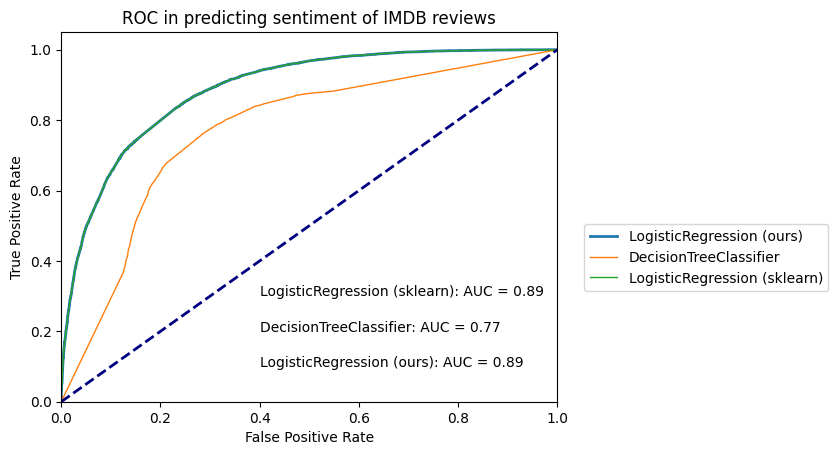

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = [DecisionTreeClassifier(),
          sk_LogisticRegression()]

perf = {}

# our implementation is slow you may try sklearn version
logitreg = LogisticRegression(verbose=False)
fit = logitreg.fit(X_reviews, ratings)
y_test_prob = fit.predict(X_reviews_test)
fpr, tpr, _ = roc_curve(y_reviews_test, y_test_prob)
auroc = roc_auc_score(y_reviews_test, y_test_prob)
perf["LogisticRegression (ours)"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc}

for model in models:
    fit = model.fit(X_reviews, ratings)
    y_test_prob = fit.predict_proba(X_reviews_test)[:,1]
    fpr, tpr, _ = roc_curve(y_reviews_test, y_test_prob)
    auroc = roc_auc_score(y_reviews_test, y_test_prob)
    if type(model).__name__ == "LogisticRegression":
        perf["LogisticRegression (sklearn)"] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    else:
        perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}


plt.clf()
i = 0
for model_name, model_perf in perf.items():
    w = 1
    if model_name == "LogisticRegression (ours)":
        w = 2
    plt.plot(model_perf['fpr'], model_perf['tpr'],label=model_name, linewidth=w)
    plt.text(0.4, i+0.1, model_name + ': AUC = '+ str(round(model_perf['auroc'],2)))
    i += 0.1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC in predicting sentiment of IMDB reviews')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")
# plt.show()
plt.savefig("roc_curve.png", bbox_inches='tight', dpi=300)
# plt.close()

## 3.4 - Report the multiclass classification accuracy of multiclass linear regression and Decision Trees on the 5 chosen classes from the 20-news-group data

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Multi-class classification with Decision Tree
# Train on original data (not one hot encoded)
dt_classifier_multi = DecisionTreeClassifier()
dt_classifier_multi.fit(X_news, y_news)
y_pred_multi = dt_classifier_multi.predict(X_test_news)

accuracy_MC = accuracy_score(y_test_news, yh)
print(f'Multiclass classification accuracy: {accuracy_MC}')

accuracy_DT = accuracy_score(y_test_news, y_pred_multi)
print(f'Decision Tree accuracy: {accuracy_DT}')

Multiclass classification accuracy: 0.7360537190082644
Decision Tree accuracy: 0.6296487603305785


## 3.5 - Further, with a plot, compare the accuracy of the two models as a function of the size of dataset (by controlling the training size).
For example, you can randomly select 20%, 40%, 60% and 80% of the available training data and train your model on this subset and evaluate the trained model on the held-out test set.

Executing model 0
Executing model 1
Executing model 2
Executing model 3
Executing model 4
Executing model 0
Executing model 1
Executing model 2
Executing model 3
Executing model 4
Executing model 0
Executing model 1
Executing model 2
Executing model 3
Executing model 4
Executing model 0
Executing model 1
Executing model 2
Executing model 3
Executing model 4


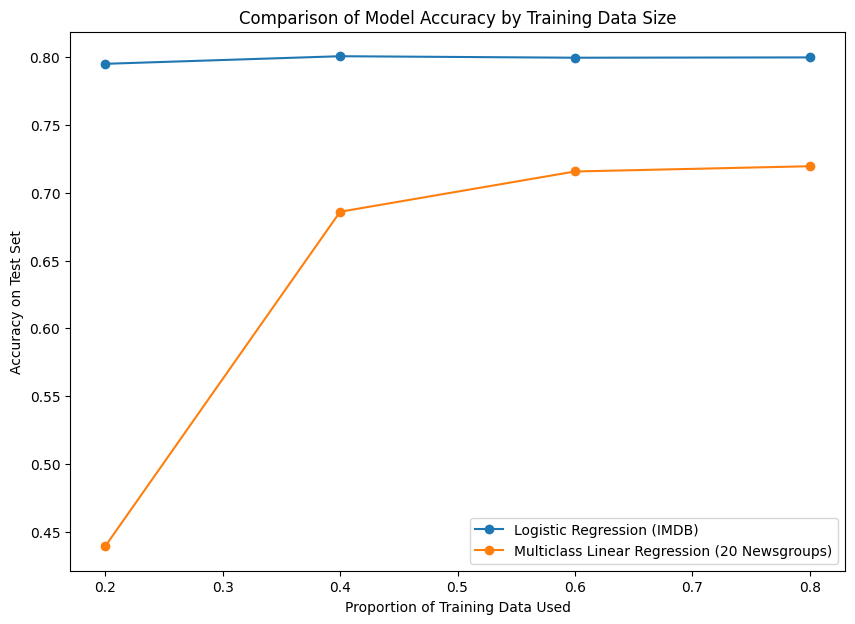

In [ ]:
def evaluate_subsets_LR(X_train, y_train, X_test, y_test, model, subsets=[0.2, 0.4, 0.6, 0.8]):
    accuracies = []
    for subset in subsets:

        subset_size_train = int(len(X_train) * subset)

        # Ensure reproducibility
        np.random.seed(42)
        idx_train = np.random.permutation(len(X_train))[:subset_size_train]

        X_train_subset = X_train[idx_train]
        y_train_subset = y_train[idx_train]

        subset_size_test = int(len(X_test) * subset)

        # Ensure reproducibility
        np.random.seed(42)
        idx_test = np.random.permutation(len(X_test))[:subset_size_test]

        X_test_subset = X_test[idx_test]
        y_test_subset = y_test[idx_test]

        # Fit the model
        model.fit(X_train_subset, y_train_subset)

        # Predict and evaluate
        predictions = model.predict(X_test_subset)
        predictions = (predictions > 0.5).astype(int)
        accuracy = np.mean(predictions == y_test_subset)
        accuracies.append(accuracy)

    return subsets, accuracies

# Logistic Regression for IMDB (assuming it is now a regression problem)
logistic_model = LogisticRegression(verbose=False)
subsets, accuracies_imdb = evaluate_subsets_LR(X_reviews, ratings, X_reviews_test, y_reviews_test, logistic_model)

def evaluate_subsets_MCLR(X_train, y_train, X_test, y_test, model, subsets=[0.2, 0.4, 0.6, 0.8]):
    accuracies = []
    for subset in subsets:
        subset_size_train = int(len(X_train) * subset)

        # Ensure reproducibility
        np.random.seed(42)
        idx_train = np.random.permutation(len(X_train))[:subset_size_train]

        X_train_subset = X_train[idx_train]
        y_train_subset = y_train[idx_train]

        subset_size_test = int(len(X_test) * subset)

        # Ensure reproducibility
        np.random.seed(42)
        idx_test = np.random.permutation(len(X_test))[:subset_size_test]

        X_test_subset = X_test[idx_test]
        y_test_subset = y_test[idx_test]

        # Convert the target labels to one-hot encoding
        y_news_one_hot = np.zeros((y_train_subset.size, y_train_subset.max()+1))
        y_news_one_hot[np.arange(y_train_subset.size), y_train_subset] = 1
        y_news_test_one_hot = np.zeros((y_test_subset.size, y_test_subset.max()+1))
        y_news_test_one_hot[np.arange(y_test_subset.size), y_test_subset] = 1

        # Fit the model
        model.fit(X_train_subset, y_news_one_hot)

        # Predict and evaluate
        predictions = model.predict(X_test_subset)
        accuracy = np.mean(predictions == y_test_subset)
        accuracies.append(accuracy)

    return subsets, accuracies

# Multiclass Linear Regression for 20 Newsgroups (adapted to regression)
# Ensure MulticlassLinearRegression is compatible with regression
multiclass_model = MulticlassLinearRegression()
subsets, accuracies_newsgroups = evaluate_subsets_MCLR(X_news, y_news, X_test_news, y_test_news, multiclass_model)

# Plot the MSE for each model as a function of the dataset size
plt.figure(figsize=(10, 7))
plt.plot(subsets, accuracies_imdb, label='Logistic Regression (IMDB)', marker='o')
plt.plot(subsets, accuracies_newsgroups, label='Multiclass Linear Regression (20 Newsgroups)', marker='o')
plt.xlabel('Proportion of Training Data Used')
plt.ylabel('Accuracy on Test Set')
plt.title('Comparison of Model Accuracy by Training Data Size')
plt.legend()
plt.show()

## 3.6 - Compare with other methods in mentioned in class

#### Ridge Regression
Ridge Regression adds "L2" regularization to the model, penalizing large coefficients.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming X_reviews and ratings are your features and target variable, respectively
# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength

# Fit the model
ridge_model.fit(X_reviews, ratings)

# Make predictions
predictions_ridge = ridge_model.predict(X_reviews_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_reviews_test, predictions_ridge)
print(f'MSE for Ridge Regression: {mse_ridge}')

predictions_ridge = (predictions_ridge > 0.5).astype(int)
accuracy = np.mean(predictions_ridge == y_reviews_test)
print(f'Accuracy: {accuracy:.2f}')

MSE for Ridge Regression: 0.15243668346369338
Accuracy: 0.80


#### LASSO Regression
LASSO Regression adds "L1" regularization, which can set some coefficients to zero, effectively performing feature selection.

In [ ]:
from sklearn.linear_model import Lasso

# Initialize LASSO Regression model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength

# Fit the model
lasso_model.fit(X_reviews, ratings)

# Make predictions
predictions_lasso = lasso_model.predict(X_reviews_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_reviews_test, predictions_lasso)
print(f'MSE for LASSO Regression: {mse_lasso}')

predictions_lasso = (predictions_lasso > 0.5).astype(int)
accuracy = np.mean(predictions_lasso == y_reviews_test)
print(f'Accuracy: {accuracy:.2f}')

MSE for LASSO Regression: 0.25
Accuracy: 0.50


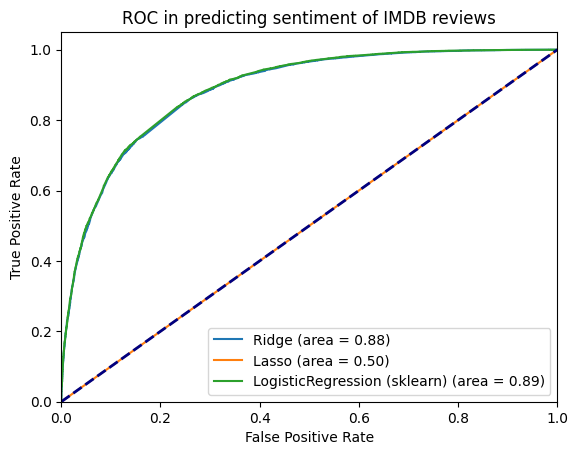

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_reviews_test are true binary labels (0 or 1)
# Compute ROC curve and ROC area for each model
fpr_ridge, tpr_ridge, _ = roc_curve(y_reviews_test, predictions_ridge)
roc_auc_ridge = roc_auc_score(y_reviews_test, predictions_ridge)

fpr_lasso, tpr_lasso, _ = roc_curve(y_reviews_test, predictions_lasso)
roc_auc_lasso = roc_auc_score(y_reviews_test, predictions_lasso)

model = sk_LogisticRegression()
fit = model.fit(X_reviews, ratings)
y_test_prob = fit.predict_proba(X_reviews_test)[:,1]
fpr, tpr, _ = roc_curve(y_reviews_test, y_test_prob)
auroc = roc_auc_score(y_reviews_test, y_test_prob)

# Plot ROC curve for Ridge
plt.figure()
plt.plot(fpr_ridge, tpr_ridge, label=f'Ridge (area = {roc_auc_ridge:.2f})')

# Plot ROC curve for Lasso
plt.plot(fpr_lasso, tpr_lasso, label=f'Lasso (area = {roc_auc_lasso:.2f})')

# Plot ROC curve for other models
plt.plot(fpr, tpr, label=f'LogisticRegression (sklearn) (area = {auroc:.2f})')

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC in predicting sentiment of IMDB reviews')
plt.legend(loc="lower right")
plt.show()